In [2]:
import atomica as at
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hep_b_vimc_functions_v0 import load_cen_project, load_sto_project, input_results, \
central_results, stochastic_results, plot_all

# Accessing individual simulations

Select one scenario (default or no vaccination) before you run the code by commenting out the other scenario.

## Central Results

In [3]:
# Default Scenario (Central)
P, res = load_cen_project(fw = 'hbv_v14_gamma_3.xlsx', db = "AFR_db_v1_3.xlsx")

# No Vaccination Scenario (Central)
P, res = load_cen_project(fw = 'hbv_v14_gamma_3.xlsx', db = "AFR_db_v1_3_no_vax.xlsx")

Elapsed time for running "default": 1.40s
Elapsed time for running "default": 1.39s


## Stochastic Results

In [16]:
# Default Scenario (Stochastic)
P, parsets, results = load_sto_project(n_samples = 30, fw = 'hbv_v14_gamma_3.xlsx', db = "AFR_db_v1_3.xlsx")

# No Vaccination Scenario (Stochastic)
P, parsets, results = load_sto_project(n_samples = 30, fw = 'hbv_v14_gamma_3.xlsx', db = "AFR_db_v1_3_no_vax.xlsx")

Elapsed time for running "default": 1.52s
Elapsed time for running "default": 1.43s
Elapsed time for running "default": 1.41s
Elapsed time for running "default": 1.45s
Elapsed time for running "default": 1.43s
Elapsed time for running "default": 1.44s
Elapsed time for running "default": 1.44s
Elapsed time for running "default": 1.55s
Elapsed time for running "default": 1.45s
Elapsed time for running "default": 1.49s
Elapsed time for running "default": 1.39s
Elapsed time for running "default": 1.43s
Elapsed time for running "default": 1.45s
Elapsed time for running "default": 1.44s
Elapsed time for running "default": 1.45s
Elapsed time for running "default": 1.48s
Elapsed time for running "default": 1.63s
Elapsed time for running "default": 1.43s
Elapsed time for running "default": 1.46s
Elapsed time for running "default": 1.44s
Elapsed time for running "default": 1.42s
Elapsed time for running "default": 1.46s
Elapsed time for running "default": 1.43s
Elapsed time for running "default"

# Plotting input result example

Demonstrate how to extract input results (boxplot)

## First load the parameter dataframe
NOTE: not all variable combinations are available, as certain variables are only non-zero for younger populations (all vaccine effectiveness and `ci_p`)

In [4]:
in_n = pd.read_csv('input_results_novax_230130.csv')

In [ ]:
# possible parameters
nathis = ['ci_p', 'm_acu', 'm_dc', 'm_hcc']
trtinv = ['te_dc_cc', 'te_icl_ict', 'te_icl_cc', 'te_cc_dc', 'te_cc_hcc', 'te_ie_cc', 'te_m_dc', 'te_m_hcc', 'te_ict_hcc', 'te_ie_hcc', 'te_icl_hcc', 'te_dc_hcc']
vacinv = ['eag_ve', 'sag_ve', 'hb3_ve', 'mav_ve']

# possible ages
ages = ['0-4', '5-14', '15-49', '50-69', '70+']

# Possible sexes
sexes = ['M', 'F']

In [12]:
# State an input parameter, age group, and sex that you would like to observe
input_par = 'te_m_dc'
age = '5-14'
sex = 'M'

<AxesSubplot:>

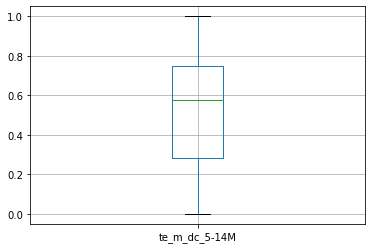

In [13]:
in_n.boxplot(column = [f'{input_par}_{age}{sex}'])

# Plotting output result example (using atomica projects)

Variables relevant to the VIMC analysis:
- Cohort size, `'alive'`
- Cases, `'tot_inc'`
- DALYs, `'dalys'`
- Deaths, `{'tot_deaths':'cl_acu+cl_dc+cl_hcc'}`
    - Acute HepB-related deaths, `'cl_acu'`
    - Decompensated Cirrhosis-related deaths, `'cl_dc'`
    - Hepatocellular Carcinoma-related deaths, `'cl_hcc'`

In [22]:
# State an output, age group and sex of the plot you would like to observe 
output = 'alive'
age = '0-4' # [0-4, 5-14, 15-49, 50-69, 70+]
sex = 'M'

# For stochastic outputs, you may view the result of any run
run_no = 25

## Other noteworthy output parameters:
- People living with chronic hepatitis B, `chb_pop`
- Prevalence of chronic hepatitis B, `prev`
- People living with hepatocellular carcinoma attributable to HBV, `hepcc`
- Chronic hepatitis B: Diagnosed Population, `diag`
- Proportion of people with the hepatitis B vaccine, `{'vac_prop':'vax/alive'}`

[<Figure size 432x288 with 1 Axes>]

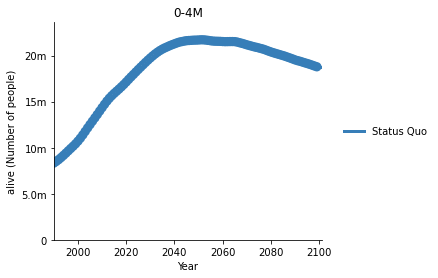

In [20]:
d=at.PlotData([res], outputs=[output], pops = f'{age}{sex}')
at.plot_series(d, data=P.data, axis="results")

[<Figure size 432x288 with 1 Axes>]

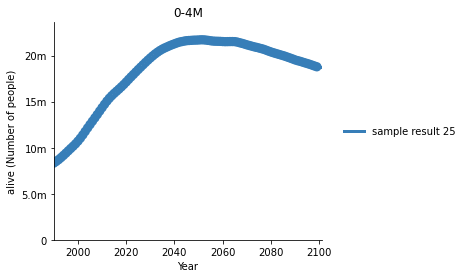

In [23]:
d=at.PlotData([results[run_no]], outputs=["alive"], pops = f'{age}{sex}')
at.plot_series(d, data=P.data, axis="results")

# Plotting output results (via csv)

The output of these plots (in our example) are a set of 30 time series of each output parameter (Cohort Size, Cases, DALYs, Deaths) foun in the csv.

Here is some additional code to analyse the results from the output csvs.

Since the cohort is separated by 1-year age bins, we selected an age that is representative of each of the original age groups in the transmission model:
- 0-4 years: 1 year olds
- 5-14 years: 10 year olds
- 15-49 years: 30 year olds
- 50-69 years: 60 year olds
- 70+ years: 80 year olds

Of course, you may change this input parameter to observe other populations.

## Load no-vax results

In [ ]:
in_df_n = pd.read_csv('input_results_novax_230130.csv')
cen_df_n = pd.read_csv('central_results_novax_230130.csv')
sto_df_n = pd.read_csv('stochastic_results_novax_230130.csv')

## Load vax results

In [ ]:
in_df_v = pd.read_csv('input_results_vax_230130.csv')
cen_df_v = pd.read_csv('central_results_vax_230130.csv')
sto_df_v = pd.read_csv('stochastic_results_vax_230130.csv')

## Plot no-vax results

In [ ]:
plot_all(cen_df = cen_df_n, sto_df = sto_df_n, age = 1)

In [ ]:
plot_all(cen_df_n, sto_df_n, 10)

In [ ]:
plot_all(cen_df_n, sto_df_n, 30)

In [ ]:
plot_all(cen_df_n, sto_df_n, 60)

In [ ]:
plot_all(cen_df_n, sto_df_n, 80)

## Plot vax results

In [ ]:
plot_all(cen_df_v, sto_df_v, 1)

In [ ]:
plot_all(cen_df_v, sto_df_v, 10)

In [ ]:
plot_all(cen_df_v, sto_df_v, 30)

In [ ]:
plot_all(cen_df_v, sto_df_v, 60)

In [ ]:
plot_all(cen_df_v, sto_df_v, 80)